In [6]:
import pandas as pd
barbie_data = pd.read_csv('barbie_data.csv')

In [7]:
#get vader scores 
import nltk
nltk.data.path.append('/Users/maryellenschuster/nltk_data')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

barbie_data['vader_scores'] = barbie_data['text'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound'])
barbie_data

,text,rating,full_date,vader_scores
0,Beautiful film but so preachy Love of Legacy M...,6.0,21 July 2023,0.9857
1,Clever and fun beginning turns into another le...,6.0,21 July 2023,0.8910
2,It was depressing cox a a out of this Was this...,8.0,24 July 2023,-0.3818
3,A Technicolor Dream heather gers Wow this movi...,9.0,24 July 2023,0.9653
4,reasons FOR seeing it and reason AGAINST im se...,7.0,22 July 2023,0.0000
...,...,...,...,...
521,Waste of times an as hak ib If ur over this mo...,2.0,23 July 2023,-0.1825
522,Barbie not good thong man The only reason this...,2.0,22 July 2023,0.5922
523,Feminism but the rest iy as kos e Im NOT a Bar...,5.0,23 July 2023,0.7934
524,Great sets great execution but horrible storyl...,3.0,28 July 2023,0.9729


In [8]:
#convert vader scores to numeric 
barbie_data['vader_scores'] = pd.to_numeric(barbie_data['vader_scores'])
barbie_data['rating'] = pd.to_numeric(barbie_data['rating'])

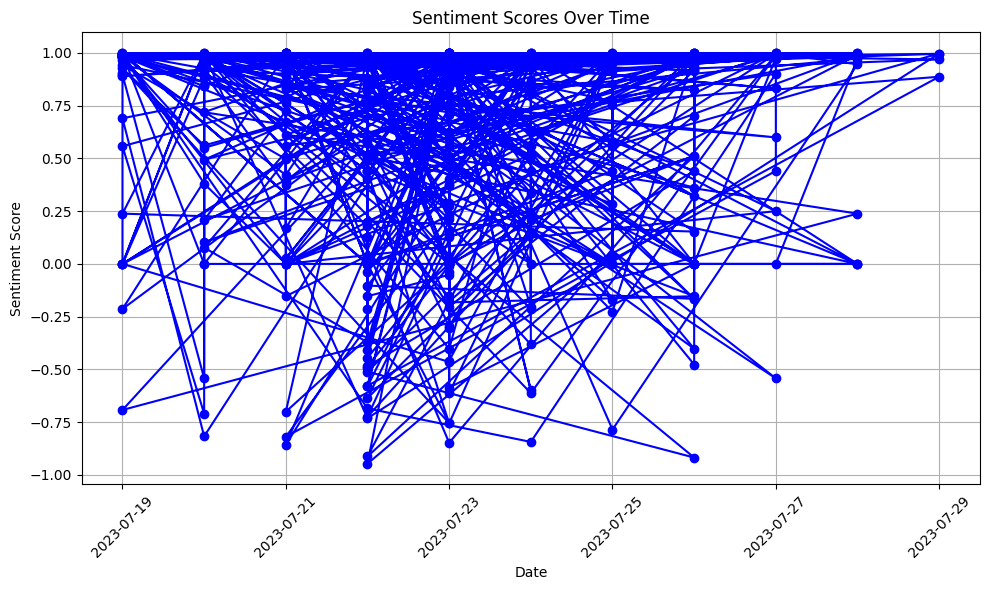

In [10]:
#Plot sentiment scores overtime
import matplotlib.pyplot as plt

df = pd.DataFrame(barbie_data)
df['full_date'] = pd.to_datetime(df['full_date'])  # Convert date column to datetime format

# Plot sentiment scores over time
plt.figure(figsize=(10, 6))
plt.plot(df['full_date'], df['vader_scores'], marker='o', color='b', linestyle='-')

plt.title('Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

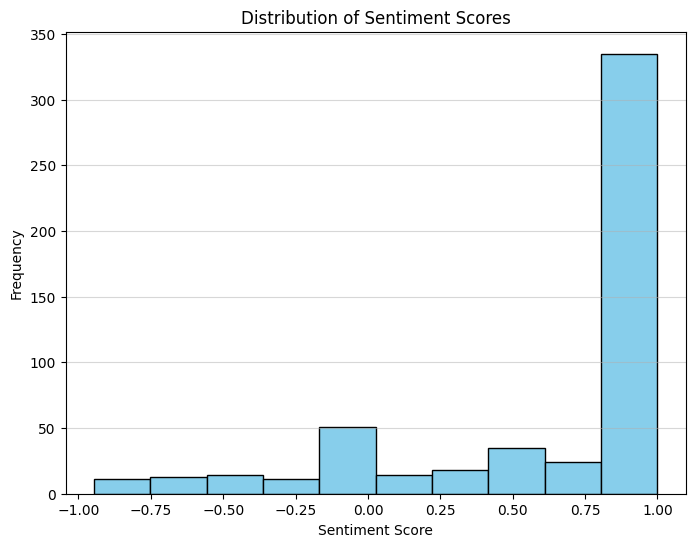

In [11]:
#distribution of sentiment scores 
import matplotlib.pyplot as plt

sentiment_scores = barbie_data['vader_scores']

# Plotting the distribution of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(sentiment_scores, bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

Correlation Coefficient: 0.27470708154562046


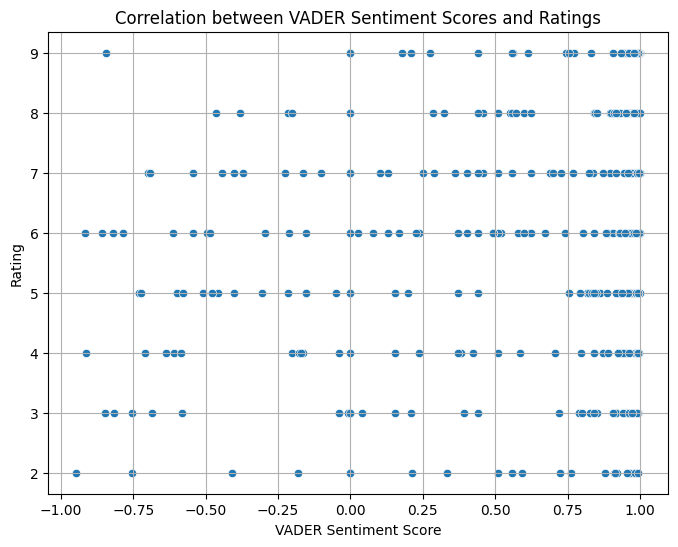

In [13]:
# Check if there are any missing values and handle them if necessary
import seaborn as sns
barbie_data.dropna(inplace=True)

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='vader_scores', y='rating', data=barbie_data)
plt.title('Correlation between VADER Sentiment Scores and Ratings')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Rating')
plt.grid(True)

# Calculate the correlation coefficient
correlation_coefficient = barbie_data['vader_scores'].corr(barbie_data['rating'])
print(f"Correlation Coefficient: {correlation_coefficient}")

plt.show()

In [15]:
##map vader scores to vader-predicted ratings
import pandas as pd
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Define a function to map sentiment scores to predicted ratings
def map_vader_to_rating(vader_score):
    if vader_score >= 0.8:
        return 9  # High positive sentiment
    elif vader_score >= 0.6:
        return 8  # Low positive sentiment
    elif vader_score >= 0.4:
        return 7 
    elif vader_score >= 0.2:
        return 6 
    elif vader_score == 0.0:
        return 5 
    elif vader_score >= -0.2:
        return 4  # Low negative sentiment
    elif vader_score >= -0.4:
        return 3  # Low negative sentiment
    elif vader_score >= -0.6:
        return 2 # Low negative sentiment
    else:
        return 1  # High negative sentiment

# Apply the function to create the new column
barbie_data['predicted_ratings'] = barbie_data['vader_scores'].apply(map_vader_to_rating)

print(barbie_data)

                                                  text  rating     full_date  \
0    Beautiful film but so preachy Love of Legacy M...     6.0  21 July 2023   
1    Clever and fun beginning turns into another le...     6.0  21 July 2023   
2    It was depressing cox a a out of this Was this...     8.0  24 July 2023   
3    A Technicolor Dream heather gers Wow this movi...     9.0  24 July 2023   
4    reasons FOR seeing it and reason AGAINST im se...     7.0  22 July 2023   
..                                                 ...     ...           ...   
521  Waste of times an as hak ib If ur over this mo...     2.0  23 July 2023   
522  Barbie not good thong man The only reason this...     2.0  22 July 2023   
523  Feminism but the rest iy as kos e Im NOT a Bar...     5.0  23 July 2023   
524  Great sets great execution but horrible storyl...     3.0  28 July 2023   
525       Just april jose y out of this Was this in to     2.0  27 July 2023   

     vader_scores  predicted_ratings  


Correlation Coefficient: 0.26440639075560685


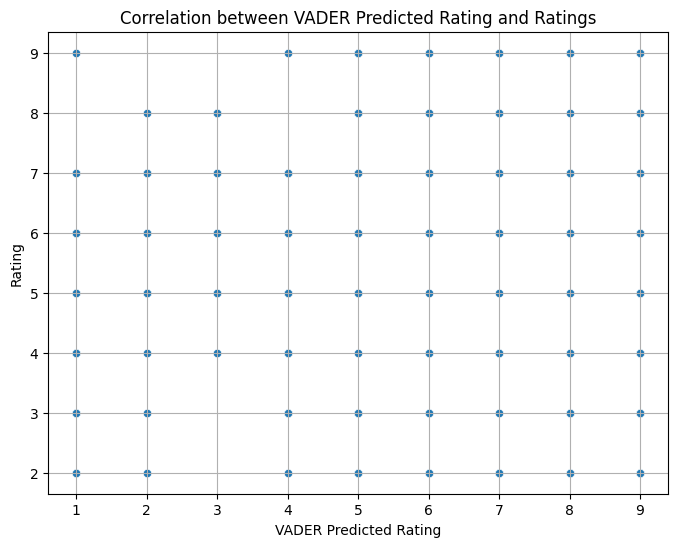

In [16]:
# Check if there are any missing values and handle them if necessary
import seaborn as sns
barbie_data.dropna(inplace=True)

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='predicted_ratings', y='rating', data=barbie_data)
plt.title('Correlation between VADER Predicted Rating and Ratings')
plt.xlabel('VADER Predicted Rating')
plt.ylabel('Rating')
plt.grid(True)

# Calculate the correlation coefficient
correlation_coefficient = barbie_data['predicted_ratings'].corr(barbie_data['rating'])
print(f"Correlation Coefficient: {correlation_coefficient}")

plt.show()